In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

from trackml.dataset import load_event
import kaggleHelpers as kH
import score


In [2]:
hits, cells, particles, truth = load_event('kaggleData/train_100_events/event000001000')
kH.procssParticles(particles)

/Users/johnda/MachineLearning/TrackingToy/kaggleHelpers.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  parts["phi"][(parts["phi"] <0)] = (parts["phi"] + 2*np.pi)
/Users/johnda/MachineLearning/TrackingToy/kaggleHelpers.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  parts["theta"][(parts["theta"] <0)] = (parts["theta"] + 2*np.pi)


In [3]:
detData = pd.read_csv("../trackingml/detectors.csv")

In [4]:
detGeo = kH.makeKaggleDetector(detData)

In [5]:
parts0GeV = particles[(particles["nhits"] > 7)]
parts5GeV = particles[(particles["pt"]>2) & (particles["nhits"] > 7)]
parts2GeV = particles[(particles["pt"]>2) & (particles["nhits"] > 7)]

In [6]:
parts5GeV.head()


particle_id        vx        vy        vz         px       py  \
16  4505317614288896 -0.009288  0.009861 -0.077879   0.861441  3.16257   
20  4505661211672576 -0.009288  0.009861 -0.077879   1.862730  1.10933   
21  4505729931149312 -0.009288  0.009861 -0.077879   2.679780  1.29403   
24  4505936089579520 -0.009288  0.009861 -0.077879  -2.060300 -1.02101   
37  4507173040160768 -0.009288  0.009861 -0.077879 -45.300701 -2.21528   

            pz  q  nhits         pt            rc       phi     theta  
16   -6.168040  1     11   3.277793   5744.581322  1.304862  2.653129  
20   -4.106770  1     10   2.168035   3799.646092  0.537134  2.655861  
21   -6.904520  1     11   2.975859   5215.417847  0.449863  2.734650  
24   -0.177392  1     14   2.299412   4029.894625  3.601685  1.647790  
37  459.528015  1     10  45.354836  79487.786001  3.190455  0.098380

In [7]:
truth[truth["particle_id"]==4507173040160768]

hit_id       particle_id          tx        ty      tz        tpx  \
46098    46099  4507173040160768  -59.412701  -2.87027   602.5 -45.299400   
49008    49009  4507173040160768  -58.919800  -2.84660   597.5 -45.299999   
49087    49088  4507173040160768  -69.270599  -3.34284   702.5 -45.300701   
52124    52125  4507173040160768  -81.100502  -3.90828   822.5 -45.300701   
55137    55138  4507173040160768  -94.902100  -4.56556   962.5 -45.300900   
57712    57713  4507173040160768 -108.653999  -5.21744  1102.0 -45.301399   
59873    59874  4507173040160768 -128.371994  -6.14791  1302.0 -45.303001   
61711    61712  4507173040160768 -148.089005  -7.07377  1502.0 -45.304798   
102422  102423  4507173040160768 -251.281006 -11.85850  2548.5 -45.319099   
103597  103598  4507173040160768 -290.734009 -13.67230  2948.5 -45.327202   

            tpy         tpz    weight  
46098  -2.17454  459.526001  0.000061  
49008  -2.17732  459.526001  0.000074  
49087  -2.16886  459.524994  0.000048  
52124  -2.16153  459.523987  0.000039  
55137  -2.15140  459.523010  0.000029  
57712  -2.14346  459.523010  0.000022  
59873  -2.13264  459.522003  0.000022  
61711  -2.12268  459.520996  0.000025  
102422 -2.08536  459.519012  0.000038  
103597 -2.08271  459.518005  0.000044

/Users/johnda/MachineLearning/TrackingToy/TrackHelper.py:39: RuntimeWarning: invalid value encountered in sqrt
  yp = yc+np.sqrt(r**2-(x-xc)**2)
/Users/johnda/MachineLearning/TrackingToy/TrackHelper.py:41: RuntimeWarning: invalid value encountered in sqrt
  ym = yc-np.sqrt(r**2-(x-xc)**2)


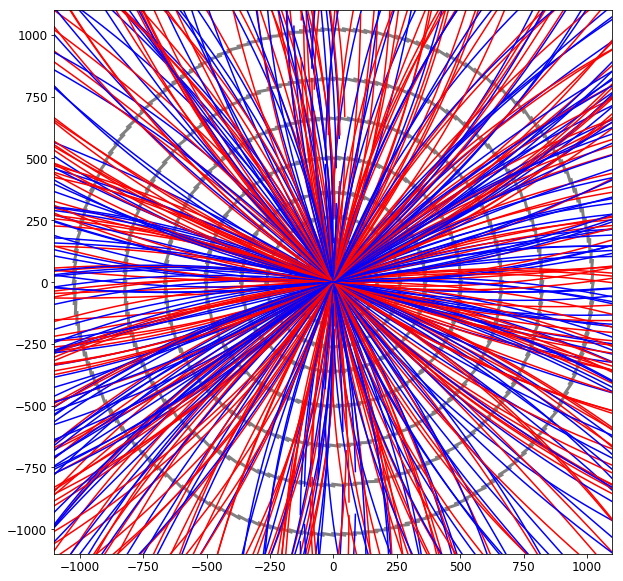

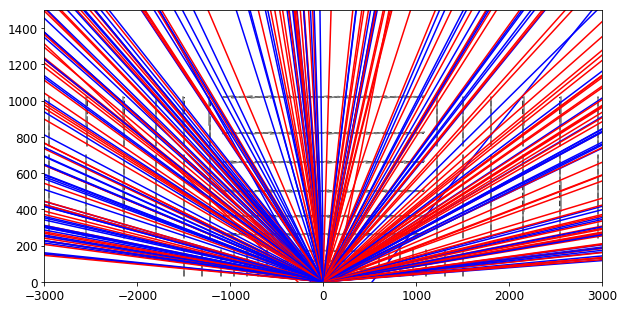

In [8]:
from TrackHelper import drawTrackXY, drawTrackZR,drawTrack

fig, ax = plt.subplots(1, figsize=(10,10))
zoom = 1100
ax.set_xlim((-1*zoom, zoom))
ax.set_ylim((-1*zoom, zoom))

detGeo.drawDetectorXY(ax,True)
#plt.plot(hits["x"],hits["y"],'ro')

for index, row in parts5GeV.iterrows():

    drawTrackXY(float(row["rc"]),float(row["phi"]),float(row["q"]),scale=1000)


fig, ax = plt.subplots(1, figsize=(10,5))
zoom = 3000
ax.set_xlim((-zoom, zoom))
ax.set_ylim((0, zoom/2))

detGeo.drawDetectorZR(ax,True)

for index, row in parts5GeV.iterrows():
    drawTrackZR(row["theta"],row["vz"],row["q"],np.sign(row["pz"])*zoom)



# Get Truth Hits

In [9]:
# Kaggle formats
eventParticles = []
eventTruth = []
eventHits = []

# For plotting 
solutions = []

hitID = 0

for index, row in parts5GeV.iterrows():
    
    phi   = row["phi"]
    q     = row["q"]
    rc    = row["rc"]
    z0    = row["vz"]
    theta = row["theta"]
    
    eventParticles.append((index,rc,phi,theta,z0,q,6))

    ps_hitXs, ps_hitYs, ps_hitZs, ps_hitRs, modulesHit, hits = detGeo.getHits3D(rc,phi,theta,z0,q)

    solutions.append([ps_hitXs, ps_hitYs, ps_hitZs, ps_hitRs, rc, phi, theta, z0, q, modulesHit, hits])

    for hitsInfo in hits:
        hitX   = hitsInfo[1]        
        hitY   = hitsInfo[2]                
        hitZ   = hitsInfo[3]                
        eventTruth.append((hitID,index,hitX,hitY,hitZ,1.0))
        eventHits .append((hitID,hitX,hitY,hitZ,hitsInfo[0][0],hitsInfo[0][1],hitsInfo[0][2]))        
        hitID += 1

/Users/johnda/MachineLearning/TrackingToy/TrackHelper.py:137: RuntimeWarning: invalid value encountered in sqrt
  closure_raw_mp = abs(yints_raw-trk_yc+np.sqrt(trk_rc2-(xints_m_raw-trk_xc)**2))
/Users/johnda/MachineLearning/TrackingToy/TrackHelper.py:138: RuntimeWarning: invalid value encountered in sqrt
  closure_raw_mm = abs(yints_raw-trk_yc-np.sqrt(trk_rc2-(xints_m_raw-trk_xc)**2))
/Users/johnda/MachineLearning/TrackingToy/TrackHelper.py:127: RuntimeWarning: invalid value encountered in sqrt
  xints_p_raw =  1*np.sqrt(cylR**2-yints_raw**2)
/Users/johnda/MachineLearning/TrackingToy/TrackHelper.py:128: RuntimeWarning: invalid value encountered in sqrt
  xints_m_raw = -1*np.sqrt(cylR**2-yints_raw**2)
/Users/johnda/MachineLearning/TrackingToy/TrackHelper.py:135: RuntimeWarning: invalid value encountered in sqrt
  closure_raw_pp = abs(yints_raw-trk_yc+np.sqrt(trk_rc2-(xints_p_raw-trk_xc)**2))
/Users/johnda/MachineLearning/TrackingToy/TrackHelper.py:136: RuntimeWarning: invalid value enco

In [10]:
recHits = np.array(eventHits)

#np.random.seed(42)
#shuffle_index = np.random.permutation(len(recHits))
#recHits = recHits[shuffle_index]
#print(len(recHits))
recHits

array([[0.00000000e+00, 8.67531573e+00, 3.14958398e+01, ...,
        8.00000000e+00, 2.00000000e+00, 1.08000000e+02],
       [1.00000000e+00, 1.92316384e+01, 6.89091432e+01, ...,
        8.00000000e+00, 4.00000000e+00, 1.83000000e+02],
       [2.00000000e+00, 3.14354034e+01, 1.10999630e+02, ...,
        8.00000000e+00, 6.00000000e+00, 1.93000000e+02],
       ...,
       [3.83200000e+03, 8.03965557e+02, 1.74059269e+02, ...,
        1.70000000e+01, 2.00000000e+00, 1.14400000e+03],
       [3.83300000e+03, 7.97513872e+02, 1.72096962e+02, ...,
        1.70000000e+01, 2.00000000e+00, 1.14500000e+03],
       [3.83400000e+03, 9.91835694e+02, 2.35442401e+02, ...,
        1.70000000e+01, 4.00000000e+00, 1.45000000e+03]])

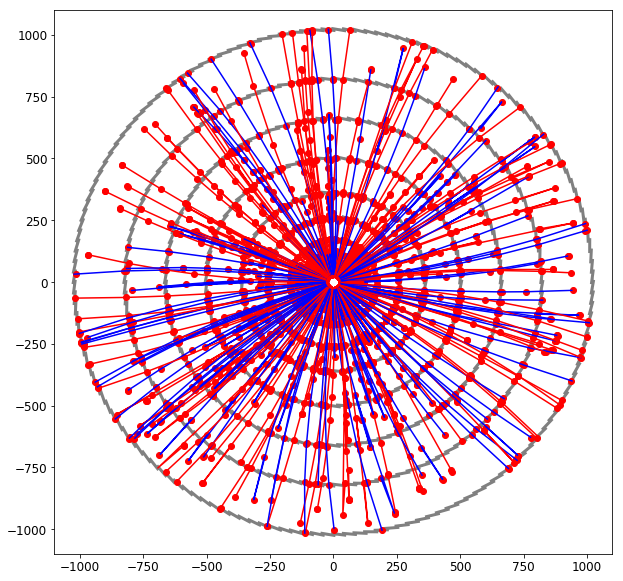

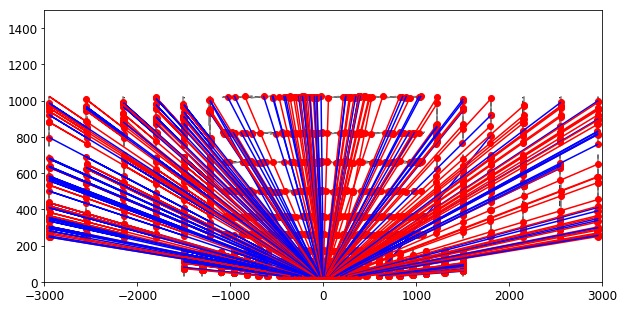

In [11]:
fig, ax = plt.subplots(1, figsize=(10,10))
zoom = 1100
ax.set_xlim((-1*zoom, zoom))
ax.set_ylim((-1*zoom, zoom))

detGeo.drawDetectorXY(ax,True)
plt.plot(recHits[:,1],recHits[:,2],'ro')

for s in solutions:
    color = "b" if (s[8] < 0) else "r"
    plt.plot(s[0],s[1],color)

fig, ax = plt.subplots(1, figsize=(10,5))
zoom = 3000
center = (0,0)
ax.set_xlim((center[0]-zoom, center[0]+zoom))
ax.set_ylim((center[1], center[1]+zoom/2))

detGeo.drawDetectorZR(ax,True)

plt.plot(recHits[:,3],np.sqrt(recHits[:,2]**2+recHits[:,1]**2),'ro')
for s in solutions:
    color = "b" if (s[8] < 0) else "r"
    plt.plot(s[2],s[3],color)

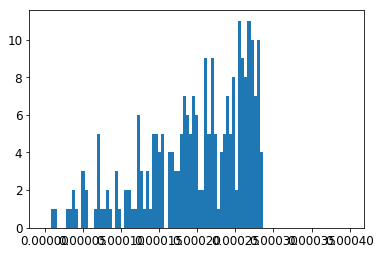

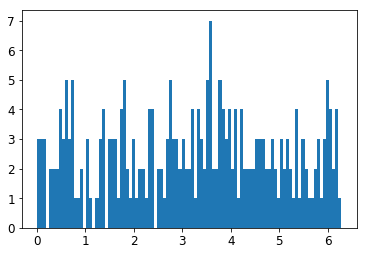

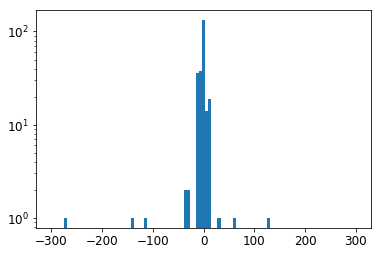

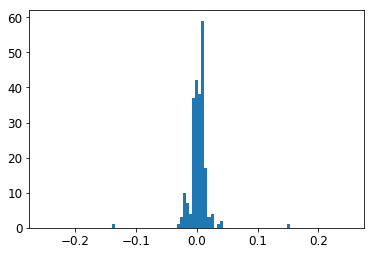

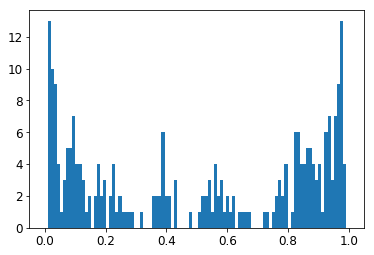

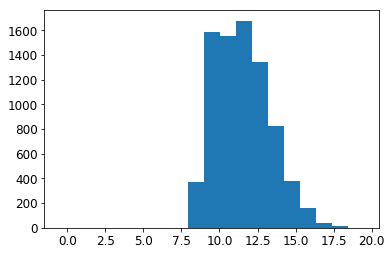

In [12]:
plt.hist(1./parts5GeV["rc"],bins=np.linspace(0*1e-3,3*1.33*1e-4,100))
plt.show()
plt.hist(parts5GeV["phi"],bins=np.linspace(0,2*np.pi,100))
plt.show()
plt.hist(parts5GeV["vz"],bins=np.linspace(-300,300,100))
plt.yscale('log')
plt.show()
plt.hist(parts5GeV["vz"],bins=np.linspace(-15,15,100))
plt.show()

plt.hist(parts5GeV["vx"],bins=np.linspace(-0.25,0.25,100))
plt.show()
plt.hist(parts5GeV["vy"],bins=np.linspace(-0.25,0.25,100))
plt.show()
plt.hist(parts5GeV["theta"]/np.pi,bins=np.linspace(0,1,100))
plt.show()

plt.hist(parts0GeV["nhits"],bins=np.linspace(-0.5,19.5,20))
plt.show()


# HT Algorithm

In [13]:
# given global posision and z0 range, return consistent theta
def getHT_ZRForTracking(hitZ, hitR, z):
    #f = np.arctan2((hitZ - z),hitR)
    #f[f<0] = f[f<0]+2*np.pi
    f = np.arctan2(hitR,(hitZ - z))
    return f

In [14]:
def getHTForTrackFinding(hitR,hitPhi,phi):
    #Convert 0-2Pi
    if hitPhi<0: hitPhi += 2*np.pi
    phi_circle = phi - np.pi/2
    return 2/hitR*(np.cos(hitPhi-phi_circle))

In [15]:
from HTTrackFinder import HTTrackFinding

In [16]:

HTFinderZThetaCoarse = HTTrackFinding(-50,50,2,0,np.pi,20,getHTFunction=getHT_ZRForTracking,
                                      nLayers=(len(detGeo.layers)+len(detGeo.disks)),
                                      minHitsPerTrack=8)


#
# Loop on rec hits
# 
for hitInfo in recHits:
    
    # (hitID,hitX,hitY,hitZ,hitZ,hitLay,hitPhi)) 
    hitID  = hitInfo[0]
    hitX   = hitInfo[1]    
    hitY   = hitInfo[2]    
    hitZ   = hitInfo[3]        

    hitVolID = int(hitInfo[4])
    hitLayID = int(hitInfo[5])    
    globalLayID = detGeo.getGlobalLayerID(hitVolID,hitLayID)

    # convert to r and phi
    hitR = np.sqrt(hitX**2 + hitY**2)
    HTFinderZThetaCoarse.addHit(globalLayID, hitID, hitZ, hitR,doRangeCut=False)


#    
# Plot Truth
#
for part in eventParticles:
    # part format (trkI,pt,phi,theta,z0,q,6)
    truePhi = part[2]
    trueQ   = part[5]
    trueRc  = part[1]    
    trueZ0  = part[4]
    trueTheta  = part[3]

    ax.plot(trueZ0,trueTheta,
            "o",markersize=20,markeredgewidth=1,markeredgecolor='r',markerfacecolor='None')

X, Y = np.meshgrid(HTFinderZThetaCoarse.xBins, HTFinderZThetaCoarse.yBins)
cmap = plt.get_cmap('binary')

HTFinderZThetaCoarse.combineLayerMaps()

In [17]:
matchedHits = HTFinderZThetaCoarse.getHitsInBin(0,0,recHits)
len(matchedHits)

812

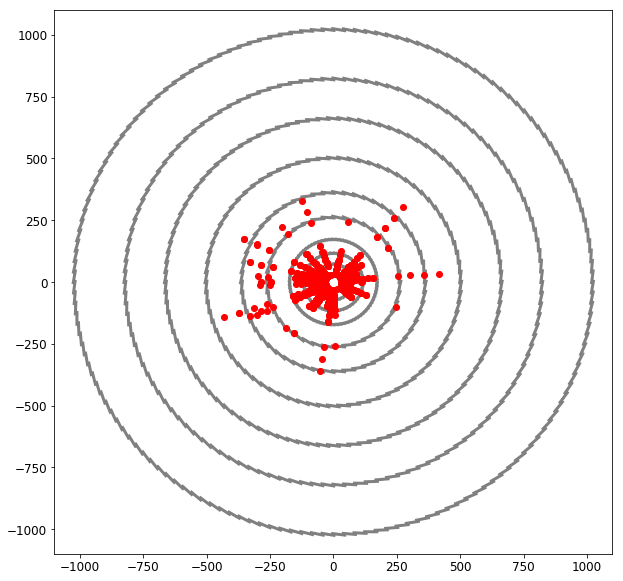

In [18]:
fig, ax = plt.subplots(1, figsize=(10,10))
zoom = 1100
ax.set_xlim((-1*zoom, zoom))
ax.set_ylim((-1*zoom, zoom))

detGeo.drawDetectorXY(ax,True)
plt.plot(matchedHits[:,1],matchedHits[:,2],'ro')

fig, ax = plt.subplots(1, figsize=(10,5))
zoom = 3000
ax.set_xlim((-zoom, zoom))
ax.set_ylim((0, zoom/2))

detGeo.drawDetectorZR(ax,True)

plt.plot(matchedHits[:,3],np.sqrt(matchedHits[:,2]**2+matchedHits[:,1]**2),'ro')


In [19]:
allRecoTracks = []
for iX in range(HTFinderZThetaCoarse.nXBins-1):
    for iY in range(HTFinderZThetaCoarse.nYBins-1):
        thisMatchedHits = HTFinderZThetaCoarse.getHitsInBin(iX,iY,recHits)
        
        if len(thisMatchedHits) < 5: continue
        
        HTFinderPtPhiFine = HTTrackFinding(0,2*np.pi,200,-3*1.33*1e-4,3*1.33*1e-4,400,
                                           getHTFunction=getHTForTrackFinding,
                                           nLayers=(len(detGeo.layers)+len(detGeo.disks)),
                                           minHitsPerTrack=8)
                                           

        
        #
        # Loop on rec hits
        # 
        for hitInfo in thisMatchedHits:

            hitID  = hitInfo[0]
            hitX   = hitInfo[1]    
            hitY   = hitInfo[2]    
            
            hitVolID = int(hitInfo[4])
            hitLayID = int(hitInfo[5])    
            globalLayID = detGeo.getGlobalLayerID(hitVolID,hitLayID)

            # convert to r and phi
            hitR = np.sqrt(hitX**2 + hitY**2)
            hitPhi = np.arctan2(hitY, hitX)
            if hitPhi<0: hitPhi += 2*np.pi
            
            HTFinderPtPhiFine.addHit(globalLayID, hitID, hitR, hitPhi)  
        
        HTFinderPtPhiFine.combineLayerMaps()
        debug = ((iX == 0) and (iY == 0))
        recoTracks = HTFinderPtPhiFine.findTracks(overlapLogicFirstHit=False,debug=False)
        allRecoTracks += recoTracks
        
        for rt in recoTracks:
            HTFinderZThetaCoarse.removeHitsFromTrack(rt,removeOverlap=False)

        print(iX,iY,len(recoTracks),len(thisMatchedHits))

0 0 26 812
0 1 24 372
0 2 12 287
0 3 10 266
0 4 11 252
0 5 3 222
0 6 6 271
0 7 14 297
0 8 1 245
0 9 6 307
0 10 14 365
0 11 5 278
0 12 3 219
0 13 2 202
0 14 11 269
0 15 10 348
0 16 18 409
0 17 24 425
0 18 26 730


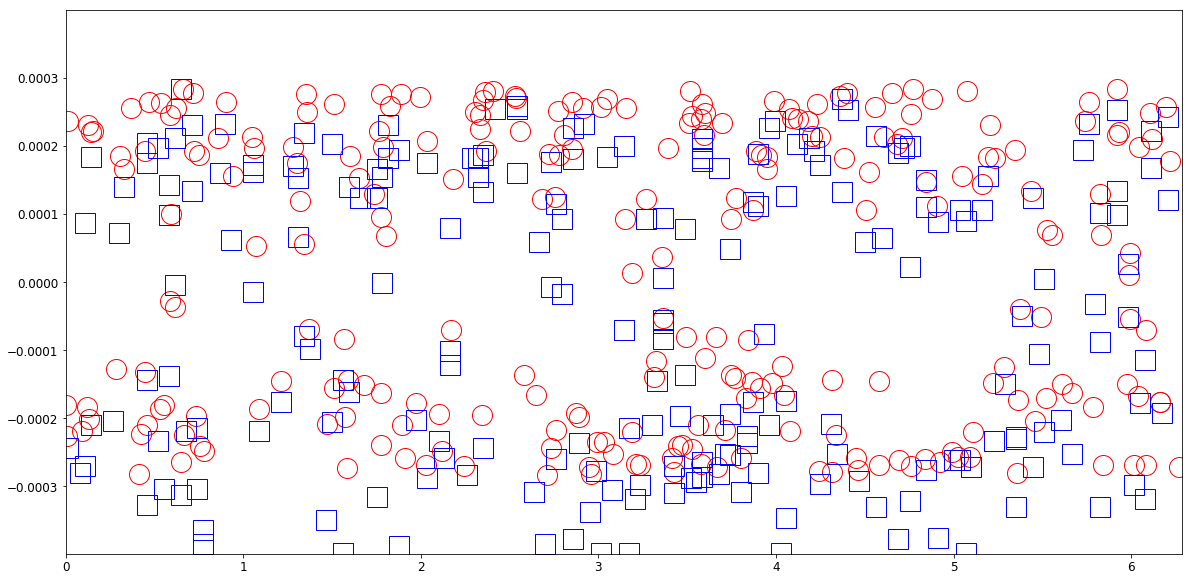

In [20]:
fig, ax = plt.subplots(1, figsize=(20,10))

#    
# Plot Truth
#
for part in eventParticles:
    # part format (trkI,pt,phi,theta,z0,q,6)
    truePhi = part[2]
    trueQ   = part[5]
    trueRc  = part[1]    
    #eventParticles.append((trkI,pt,phi,q,6))

    ax.plot(truePhi,trueQ*1/trueRc,
            "o",markersize=20,markeredgewidth=1,markeredgecolor='r',markerfacecolor='None')


#
#  Tracks
#
ax.set_xlim(0,2*np.pi)
ax.set_ylim(-3*1.33*1e-4,3*1.33*1e-4)
for rT in allRecoTracks:
    recPhi  = rT[0]
    recQ    = rT[2]
    recCurv = rT[1]

    ax.plot(recPhi,recCurv,
            "s",markersize=20,markeredgewidth=1,markeredgecolor='b',markerfacecolor='None')


        
plt.show()

In [21]:
from TrackHelper import getTruthDF
my_truth = getTruthDF(eventTruth)

In [22]:
my_truth.head(20)

hit_id  particle_id  weight
0      0.0         16.0     1.0
1      1.0         16.0     1.0
2      2.0         16.0     1.0
3      3.0         16.0     1.0
4      4.0         16.0     1.0
5      5.0         16.0     1.0
6      6.0         16.0     1.0
7      7.0         16.0     1.0
8      8.0         16.0     1.0
9      9.0         16.0     1.0
10    10.0         16.0     1.0
11    11.0         16.0     1.0
12    12.0         20.0     1.0
13    13.0         20.0     1.0
14    14.0         20.0     1.0
15    15.0         20.0     1.0
16    16.0         20.0     1.0
17    17.0         20.0     1.0
18    18.0         20.0     1.0
19    19.0         20.0     1.0

In [23]:
solnsAll = HTFinderPtPhiFine.getSolutionsFromTracks(allRecoTracks)
score.score_event(my_truth,solnsAll)

0.8338983050847457

In [ ]:
solnsAll.head(20)

In [ ]:

HTFinderPtPhi = HTTrackFinding(0,2*np.pi,200,-1.33*1e-4,1.33*1e-4,400,getHTFunction=getHTForTrackFinding,
                               nLayers=(len(detGeo.layers)+len(detGeo.disks)),
                               minHitsPerTrack=8,
                              ) 

fig, ax = plt.subplots(1, figsize=(20,10))

#
# Loop on rec hits
# 
for hitInfo in recHits:
    
    # hitInfo format (hitID,xHits[hitItr],yHits[hitItr],zHits[hitItr],hitItr)

    hitID  = hitInfo[0]
    hitX   = hitInfo[1]    
    hitY   = hitInfo[2]    
    #hitZ   = hitInfo[3]    

    hitVolID = int(hitInfo[4])
    hitLayID = int(hitInfo[5])    
    globalLayID = detGeo.getGlobalLayerID(hitVolID,hitLayID)
    
    # convert to r and phi
    hitR = np.sqrt(hitX**2 + hitY**2)
    hitPhi = np.arctan2(hitY, hitX)
    if hitPhi<0: hitPhi += 2*np.pi
    
    HTFinderPtPhi.addHit(globalLayID, hitID, hitR, hitPhi)


#    
# Plot Truth
#
for part in eventParticles:
    # part format (trkI,pt,phi,theta,z0,q,6)
    truePhi = part[2]
    trueQ   = part[5]
    trueRc  = part[1]    
    #eventParticles.append((trkI,pt,phi,q,6))

    ax.plot(truePhi,trueQ*1/trueRc,
            "o",markersize=20,markeredgewidth=1,markeredgecolor='r',markerfacecolor='None')

X, Y = np.meshgrid(HTFinderPtPhi.xBins, HTFinderPtPhi.yBins)
cmap = plt.get_cmap('binary')

HTFinderPtPhi.combineLayerMaps()

#
#  Tracks
#
plt.figure(1)

ax.set_xlim(0,2*np.pi)
ax.set_ylim(-1.33*1e-4,1.33*1e-4)
H = np.array(HTFinderPtPhi.HitDB.combinedHitsCounts).T
im = ax.pcolormesh(X, Y, H,cmap=cmap)
fig.colorbar(im, ax=ax)

recoTracks = HTFinderPtPhi.findTracks()
for rT in recoTracks:
    recPhi  = rT[0]
    recQ    = rT[2]
    recCurv = rT[1]

    ax.plot(recPhi,recCurv,
            "s",markersize=20,markeredgewidth=1,markeredgecolor='b',markerfacecolor='None')

        
plt.show()

In [ ]:
solns = HTFinderPtPhi.getSolutions()

from TrackHelper import getTruthDF
truth = getTruthDF(eventTruth)

In [ ]:
score.score_event(truth,solns)

In [ ]:

HTFinderZTheta = HTTrackFinding(-50,50,200,0*np.pi/400,400*np.pi/400,400,getHTFunction=getHT_ZRForTracking,
                                nLayers=(len(detGeo.layers)+len(detGeo.disks)),
                                minHitsPerTrack=8)

fig, ax = plt.subplots(1, figsize=(20,10))

#
# Loop on rec hits
# 
for hitInfo in recHits:
    
    # hitInfo format (hitID,xHits[hitItr],yHits[hitItr],zHits[hitItr],hitItr)

    hitID  = hitInfo[0]
    hitX   = hitInfo[1]    
    hitY   = hitInfo[2]    
    hitZ   = hitInfo[3]    

    hitVolID = int(hitInfo[4])
    hitLayID = int(hitInfo[5])    
    globalLayID = detGeo.getGlobalLayerID(hitVolID,hitLayID)
    
    # convert to r and phi
    hitR = np.sqrt(hitX**2 + hitY**2)
    
    HTFinderZTheta.addHit(globalLayID, hitID, hitZ, hitR,doRangeCut=False)


#    
# Plot Truth
#
for part in eventParticles:
    # part format (trkI,pt,phi,theta,z0,q,6)
    truePhi = part[2]
    trueQ   = part[5]
    trueRc  = part[1]    
    trueZ0  = part[4]
    trueTheta  = part[3]

    ax.plot(trueZ0,trueTheta,
            "o",markersize=20,markeredgewidth=1,markeredgecolor='r',markerfacecolor='None')

X, Y = np.meshgrid(HTFinderZTheta.xBins, HTFinderZTheta.yBins)
cmap = plt.get_cmap('binary')

HTFinderZTheta.combineLayerMaps()

#
#  Tracks
#
plt.figure(1)

ax.set_xlim(-50,50)
ax.set_ylim(15*np.pi/400,385*np.pi/400)
H = np.array(HTFinderZTheta.HitDB.combinedHitsCounts).T
im = ax.pcolormesh(X, Y, H,cmap=cmap)
fig.colorbar(im, ax=ax)

recoTracks = HTFinderZTheta.findTracks()
for rT in recoTracks:
    recZ0  = rT[0]
    recQ    = rT[2]
    recTheta = rT[1]

    ax.plot(recZ0,recTheta,
            "s",markersize=20,markeredgewidth=1,markeredgecolor='b',markerfacecolor='None')

        
plt.show()

In [ ]:
solnsZT = HTFinderZTheta.getSolutions()
score.score_event(truth,solnsZT)